# Trabajo práctico 3 - Organización de datos
## Parte I: Análisis Exploratorio
### Facultad de ingeniería - Universidad de Buenos Aires


---


Alumna: Agustina Bocaccio \\
Padron: 106393 \\
Email: abocaccio@fi.uba.ar \\

---

#### Segundo cuatrimestre 2021
#### Fecha de entrega: 28 de noveimbre de 2021



## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1YGDFxRvxm1wMVaL3E5GpgP2KQqun8OFj'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_identity.csv')

train_identity  = pd.read_csv('train_identity.csv')
train_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,NaN,427.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,352.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.1.1,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,27.0,567.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,15.0,352.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_9_5,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [ ]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
id='1vAH4o97zYZ2RT8Mbgz3Be4AN2xxbA_4W'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_transaction.csv')

train_transaction  = pd.read_csv('train_transaction.csv')
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
transactions_and_indentities = train_transaction.join(train_identity, lsuffix='TransactionID', rsuffix='TransactionID', how= 'outer')
transactions_and_indentities

,TransactionIDTransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,1581

In [ ]:
correlations = transactions_and_indentities.corr()
correlations

,TransactionIDTransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,TransactionIDTransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
TransactionIDTransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,-0.027043,-0.026273,-0.053154,-0.055186,-0.008896,-0.057235,0.024444,-0.050376,-0.059485,-0.060490,0.033460,-0.062073,-0.054122,-0.058796,-0.017455,-0.043123,0.074338,0.026477,-0.006997,0.058633,0.002053,0.081941,-0.071569,-0.071505,-0.015457,0.056533,0.100242,0.052536,0.023352,0.095742,...,0.227296,0.089691,0.251746,0.242576,0.240570,0.244867,0.250831,0.199285,0.219190,0.223816,0.005893,0.179740,0.103030,0.074034,0.203922,0.162702,0.983442,-0.097969,0.176507,-0.027405,0.000938,-0.060174,-0.028704,-0.103939,0.040510,-0.034161,0.010646,0.034738,0.071519,0.040797,0.239735,0.115378,-0.022907,0.088561,-0.045001,0.052699,-0.057259,0.020670,0.001818,-0.049421
isFraud,0.014166,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,0.021522,-0.019054,0.030570,0.037229,-0.006833,0.030382,-0.030754,0.020909,0.028160,0.032139,-0.031703,0.028396,0.027484,0.031905,-0.011146,0.007921,-0.067193,-0.083583,-0.046271,-0.067216,-0.064638,-0.057236,-0.127199,-0.142636,-0.044253,-0.072002,-0.045094,-0.028864,-0.059430,-0.008663,...,-0.024006,0.007792,-0.006838,-0.001050,-0.011053,-0.023099,-0.021164,-0.021982,-0.023468,-0.024134,-0.000451,-0.005456,-0.002402,-0.005702,-0.019356,-0.014663,0.007155,0.001209,-0.006195,-0.003787,-0.004950,0.002141,0.001541,-0.010620,-0.004329,-0.001365,0.001460,0.002298,0.002908,0.000666,-0.003713,-0.009040,0.000840,-0.001578,0.038820,0.020338,0.009990,-0.000063,0.012422,-0.000147
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.010625,-0.019202,-0.011222,-0.024132,-0.000051,0.051972,-0.027295,-0.026860,-0.049318,-0.051126,-0.007546,-0.053104,0.023800,-0.046612,-0.055402,-0.056288,0.032732,-0.057734,-0.050181,-0.054738,-0.015022,-0.039721,0.074031,0.027109,-0.007200,0.059797,0.001767,0.084581,-0.070221,-0.068752,-0.013735,0.058409,0.101266,0.053108,0.024405,0.097509,...,0.234674,0.091039,0.257295,0.248494,0.247530,0.252599,0.258603,0.205671,0.226312,0.231072,0.005762,0.184407,0.105783,0.075892,0.210240,0.167524,0.970299,-0.098281,0.173201,-0.028124,0.001934,-0.059251,-0.028799,-0.097153,0.040090,-0.033789,0.011594,0.035844,0.056941,0.040173,0.238472,0.116359,-0.022703,0.088085,-0.051960,0.050779,-0.059103,0.019173,0.000234,-0.043392
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109785,0.003061,-0.007421,0.028312,0.026146,0.023143,-0.017722,-0.018468,-0.004798,-0.010148,-0.030560,-0.016982,-0.017061,-0.014820,-0.030021,-0.015958,-0.017313,-0.017135,-0.040034,-0.022435,-0.039985,-0.003760,-0.002166,-0.050347,-0.001490,0.057674,0.099719,0.096806,0.073852,-0.038982,-0.088448,-0.065834,0.041298,0.072110,...,-0.009281,0.018288,-0.069407,-0.046455,0.038277,-0.004608,0.003909,0.024319,0.010808,0.017385,0.078751,0.044830,0.070651,0.129452,0.082064,0.105996,-0.008580,-0.005494,-0.001574,-0.002021,-0.006216,-0.000897,-0.001073,0.005328,0.004403,-0.000398,0.001306,0.002972,-0.008196,-0.001450,-0.003025,0.004291,0.003220,-0.002855,-0.017997,0.007569,-0.021137,0.001941,0.015339,0.003675
card1,0.010122,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,0.005152,-0.003749,0.005716,0.005199,-0.004710,0.005193,0.005752,0.006575,0.004641,0.004645,0.004370,0.003794,0.005808,0.004210,0.004300,0.007366,-0.006619,-0.012949,-0.005352,-0.002721,-0.003120,-0.002899,-0.022303,-0.040851,-0.000275,-0.000844,-0.005144,-0.020610,-0.028603,0.034955,...,0.138616,0.031315,0.079462,0.098211,0.13

In [ ]:
correlations['isFraud'].nlargest()

isFraud    1.000000
V257       0.383060
V246       0.366878
V244       0.364129
V242       0.360590
Name: isFraud, dtype: float64

## Violin plot - V87 distribution for fraud

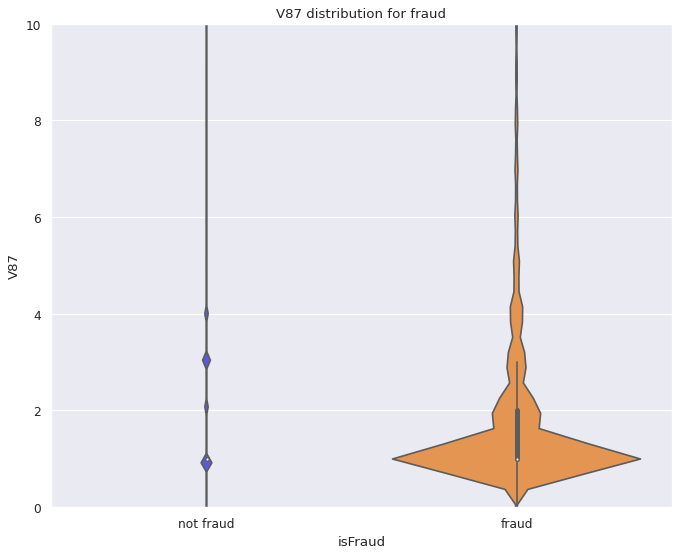

In [ ]:
plt.figure(dpi=80)
plt.title("V87 distribution for fraud")
sns.violinplot(data=train_transaction, y='V87', x='isFraud', palette=['#4346F0', "#FC933A"])
plt.ylim(0, 10)
plt.xticks([0, 1],['not fraud', 'fraud'])
plt.ylabel('V87')

plt.show()

## Bar char - 5 most used browsers to commit fraud

In [ ]:
browser_fraud = transactions_and_indentities.loc[transactions_and_indentities['isFraud']==1, ['isFraud', 'id_31']].groupby('id_31').sum()
browser_fraud['isFraud'].nlargest(5)

id_31
chrome 63.0              568
mobile safari 11.0       393
mobile safari generic    253
ie 11.0 for desktop      229
chrome 62.0              209
Name: isFraud, dtype: int64

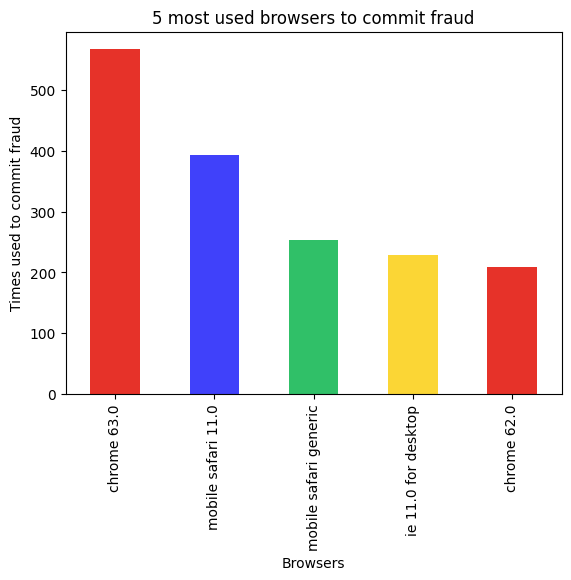

In [ ]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
browser_fraud['isFraud'].nlargest(5).plot.bar(color= {'#4041FA', '#30C068', '#FBD635', '#E63229'})
plt.ylabel("Times used to commit fraud")
plt.xlabel("Browsers")
plt.title("5 most used browsers to commit fraud")
plt.show()

## Heatmap - Percentage correlation between cards and products used on fraud transactions

In [ ]:
train_transaction_fraud = train_transaction.loc[train_transaction['isFraud']==1, :]

In [ ]:
cards_products = pd.pivot_table(data = train_transaction_fraud, index = 'ProductCD', values = 'isFraud', columns = 'card4', aggfunc= 'count')
cards_products= cards_products.fillna(0)
cards_products

card4,american express,discover,mastercard,visa
ProductCD,,,,
C,2.0,0.0,3072.0,4916.0
H,91.0,45.0,413.0,1024.0
R,111.0,56.0,373.0,885.0
S,35.0,77.0,200.0,374.0
W,0.0,336.0,2438.0,6174.0


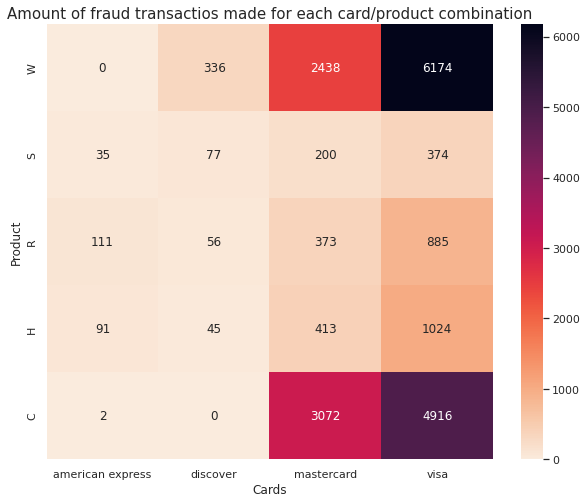

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})

cards_products.sort_index(ascending =  False, inplace = True)
g = sns.heatmap(cards_products, cmap="rocket_r", annot=True, fmt='g')
g.set_ylabel("Product")
g.set_xlabel("Cards")
g.set_title("Amount of fraud transactios made for each card/product combination", size=15)
plt.show()

## Box plot - Transactions amount distribution made for each product when commiting fraud

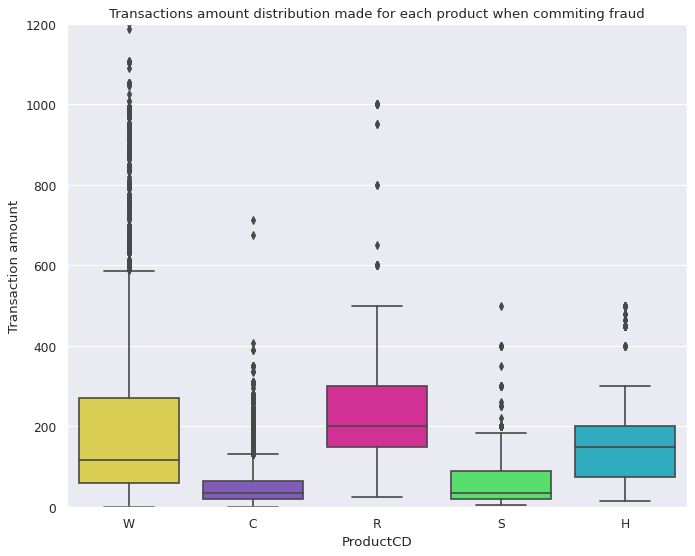

In [ ]:
plt.figure(dpi=80)
plt.title("Transactions amount distribution made for each product when commiting fraud")
sns.boxplot(data=train_transaction_fraud, y='TransactionAmt', x='ProductCD', palette=['#F0DF3E', "#7F4EC7", "#EB179A", "#40F55E", "#19BED6"])
plt.ylabel('Transaction amount')
plt.ylim(0,1200)
plt.show()

## Bar plot - Most used purchaser/recipient email domains used to commit fraud

las duplas de mails mas propensas cuando se hace fraude

In [ ]:
email_tuples = train_transaction_fraud.loc[: ,['P_emaildomain','R_emaildomain']].dropna().apply(lambda x: (x['P_emaildomain'], x['R_emaildomain']), axis = 1)
email_tuples.value_counts().nlargest(5)

(gmail.com, gmail.com)            6141
(hotmail.com, hotmail.com)        2098
(anonymous.com, anonymous.com)     529
(outlook.com, outlook.com)         391
(yahoo.com, yahoo.com)             337
dtype: int64

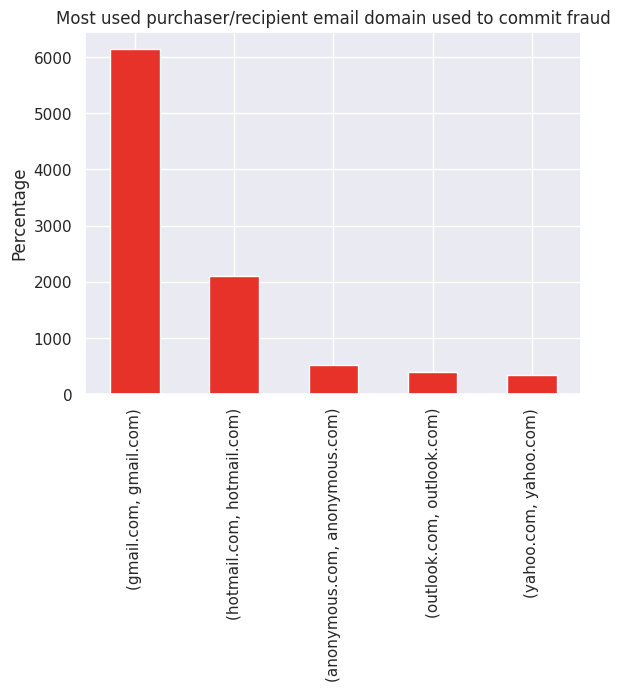

In [ ]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
email_tuples.value_counts().nlargest(5).nlargest(5).plot.bar(color= {'#E63229'})
plt.ylabel("Percentage")
plt.xlabel("")
plt.title("Most used purchaser/recipient email domain used to commit fraud")
plt.show()

## Line chart - Sold amount for each product sold during time in fraudulent transactions

In [ ]:
bins= [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 11000000, 12000000, 13000000, 14000000, 15000000, 16000000]
transactiondt_cut = pd.cut(train_transaction['TransactionDT'], bins)
transactiondt_cut

0                 (0, 1000000]
1                 (0, 1000000]
2                 (0, 1000000]
3                 (0, 1000000]
4                 (0, 1000000]
                  ...         
590535    (15000000, 16000000]
590536    (15000000, 16000000]
590537    (15000000, 16000000]
590538    (15000000, 16000000]
590539    (15000000, 16000000]
Name: TransactionDT, Length: 590540, dtype: category
Categories (16, interval[int64]): [(0, 1000000] < (1000000, 2000000] < (2000000, 3000000] <
                                   (3000000, 4000000] ... (12000000, 13000000] <
                                   (13000000, 14000000] < (14000000, 15000000] < (15000000, 16000000]]

In [ ]:
train_transaction_time_products = train_transaction.loc[train_transaction['isFraud']==1, ['TransactionDT', 'ProductCD', 'isFraud']]
train_transaction_time_products['TransactionDT'] = transactiondt_cut
a = train_transaction_time_products['TransactionDT'].value_counts().to_dict()
a

{Interval(0, 1000000, closed='right'): 1137,
 Interval(1000000, 2000000, closed='right'): 1420,
 Interval(2000000, 3000000, closed='right'): 1264,
 Interval(3000000, 4000000, closed='right'): 1376,
 Interval(4000000, 5000000, closed='right'): 1367,
 Interval(5000000, 6000000, closed='right'): 1622,
 Interval(6000000, 7000000, closed='right'): 1387,
 Interval(7000000, 8000000, closed='right'): 1369,
 Interval(8000000, 9000000, closed='right'): 1318,
 Interval(9000000, 10000000, closed='right'): 1488,
 Interval(10000000, 11000000, closed='right'): 1525,
 Interval(11000000, 12000000, closed='right'): 1128,
 Interval(12000000, 13000000, closed='right'): 990,
 Interval(13000000, 14000000, closed='right'): 1068,
 Interval(14000000, 15000000, closed='right'): 1166,
 Interval(15000000, 16000000, closed='right'): 1038}

In [ ]:
# me guardo la cantidad de veces que aparece ese bucket en el dataframe
train_transaction_time_products['amount_bucket'] = train_transaction_time_products['TransactionDT'].map(a)
train_transaction_time_products

,TransactionDT,ProductCD,isFraud,amount_bucket
203,"(0, 1000000]",W,1,1137
240,"(0, 1000000]",C,1,1137
243,"(0, 1000000]",C,1,1137
245,"(0, 1000000]",C,1,1137
288,"(0, 1000000]",C,1,1137
...,...,...,...,...
590361,"(15000000, 16000000]",W,1,1038
590364,"(15000000, 16000000]",C,1,1038
590368,"(15000000, 16000000]",H,1,1038
590372,"(15000000, 16000000]",W,1,1038


In [ ]:
table_fraud_time = pd.pivot_table(data = train_transaction_time_products, index = 'TransactionDT', values = 'isFraud', columns = 'ProductCD', aggfunc= 'sum')
table_fraud_time= a.fillna(0)
table_fraud_time

ProductCD,C,H,R,S,W
TransactionDT,,,,,
"(0, 1000000]",416,102,61,27,531
"(1000000, 2000000]",581,203,87,32,517
"(2000000, 3000000]",538,114,86,38,488
"(3000000, 4000000]",513,154,148,36,525
"(4000000, 5000000]",427,156,130,18,636
"(5000000, 6000000]",637,131,117,67,670
"(6000000, 7000000]",498,97,173,69,550
"(7000000, 8000000]",467,118,74,53,657
"(8000000, 9000000]",439,104,42,49,684


Text(0, 0.5, 'Units sold')

<Figure size 1000x1000 with 0 Axes>

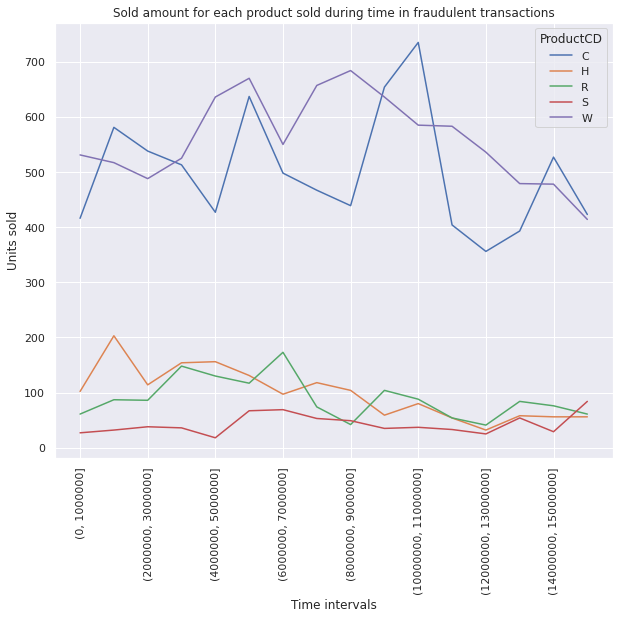

In [ ]:
plt.figure(figsize=(10, 10), dpi=100)
table_fraud_time.plot.line()
plt.title('Sold amount for each product sold during time in fraudulent transactions')
plt.xlabel('Time intervals')
plt.xticks(rotation=90)
plt.ylabel('Units sold')